In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2 as cv

Text(0.5, 0.98, 'HandSign Examples')

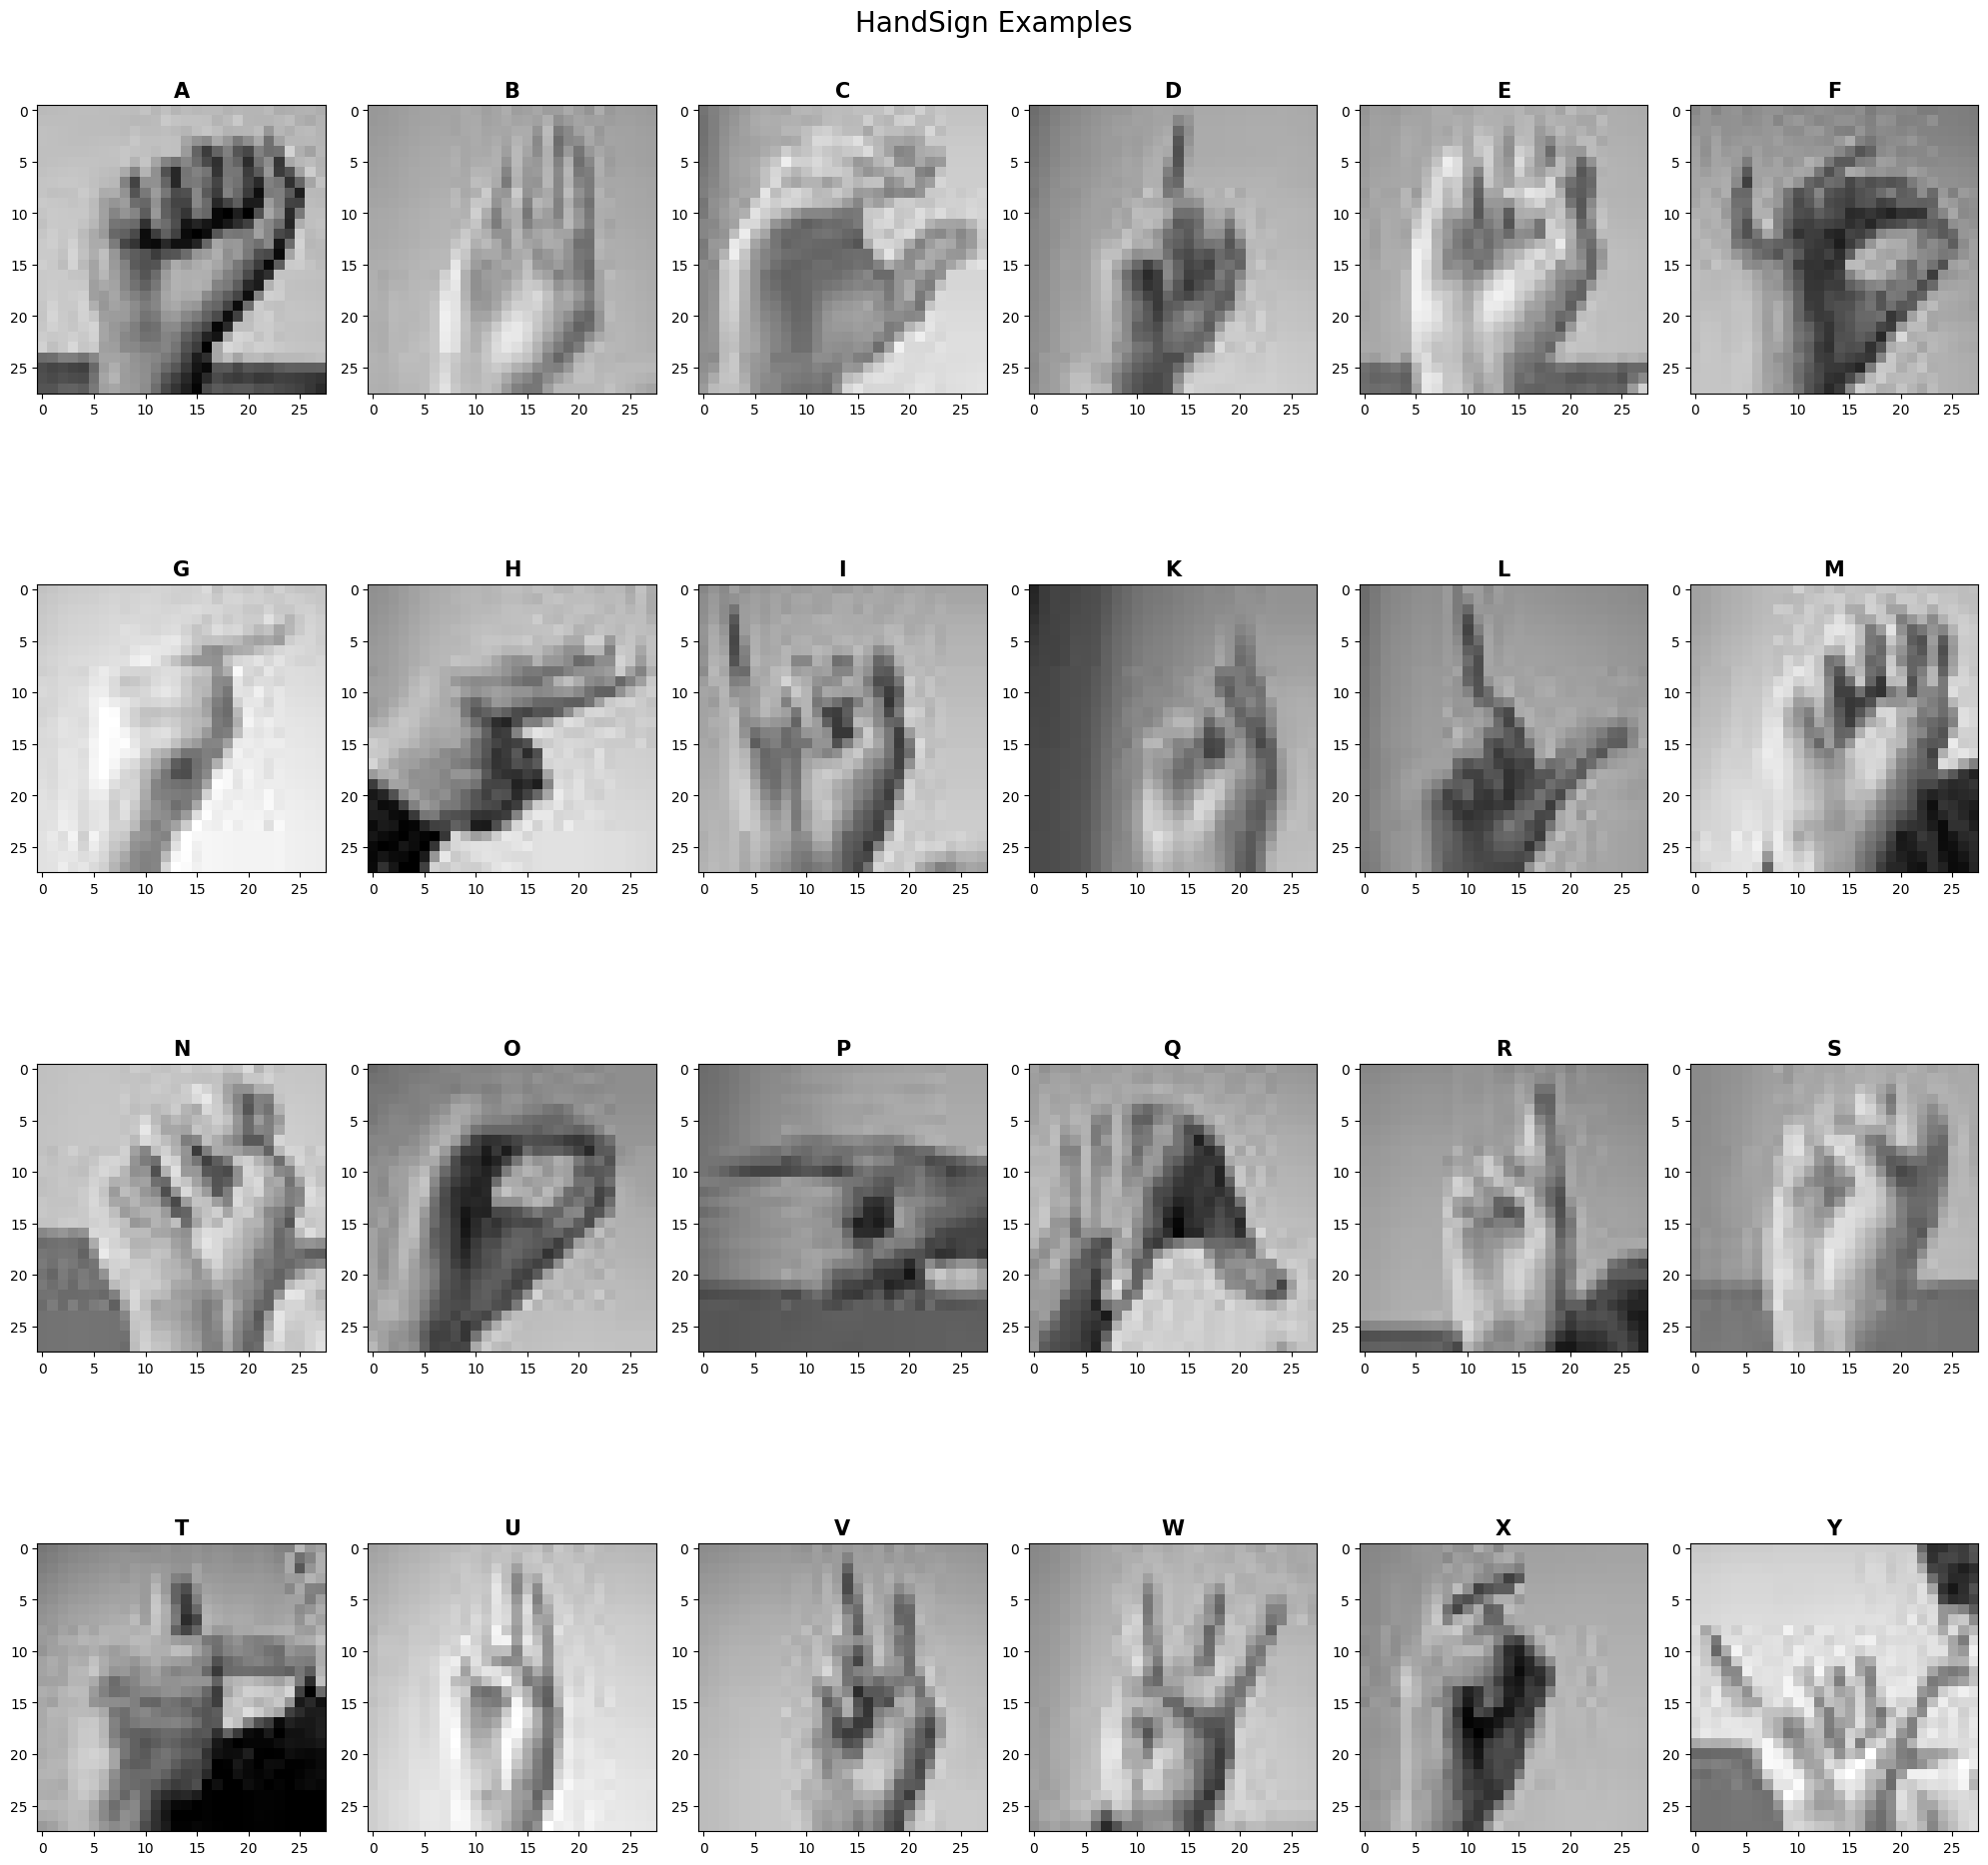

In [4]:
DIR = 'Dataset/Train'

fig, axes = plt.subplots(4, 6, figsize=(20, 20))

for filename, ax in zip(os.listdir(DIR), axes.flatten()):
    image_path = os.path.join(DIR, filename)
    first_image = os.listdir(image_path)[0]
    full_path = os.path.join(image_path, first_image)
    img = cv.imread(full_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(filename, fontweight='bold', fontsize=15)
    
fig.tight_layout()
fig.suptitle('HandSign Examples', fontsize=20)

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 64

train_data = image_dataset_from_directory(
    directory=DIR, 
    seed=24,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    labels='inferred',
    label_mode = 'categorical',
    shuffle=True,
    color_mode='grayscale'
)

val_data = image_dataset_from_directory(
    directory='Dataset/Test', 
    seed=24,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False,
    color_mode='grayscale',
    labels='inferred',
    label_mode = 'categorical'
)

Found 27455 files belonging to 24 classes.
Found 7172 files belonging to 24 classes.


In [4]:
class_nums = len(train_data.class_names)
print(class_nums)

24


In [107]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.4),
    layers.RandomZoom(0.4),
])

In [108]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Input, BatchNormalization, LayerNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = Sequential([
    Input(shape=IMAGE_SIZE + (1, )),
    data_augmentation,
    BatchNormalization(),
    
    Conv2D(16, (3, 3), padding='same', activation='gelu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(32, (3, 3), padding='same', activation='gelu'),
    AveragePooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    LayerNormalization(),
    
    Conv2D(32, (3, 3), padding='same', activation='gelu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='gelu'),
    AveragePooling2D(pool_size=(3, 3)),
    Dropout(0.3),
    LayerNormalization(),
    
    Flatten(),
    Dense(class_nums, activation='softmax'),
])

In [109]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_36 (Sequential)      │ (None, 224, 224, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_82          │ (None, 224, 224, 1)    │             4 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_130 (Conv2D)             │ (None, 224, 224, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_83          │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_95 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_131 (Conv2D)             │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_12            │ (None, 56, 56, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_82          │ (None, 56, 56, 32)     │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_132 (Conv2D)             │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_84          │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_96 (MaxPooling2D) │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_133 (Conv2D)             │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_13            │ (None, 9, 9, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_83          │ (None, 9, 9, 64)       │           128 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_34 (Flatten)            │ (None, 5184)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 24)             │       124,440 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 157,372 (614.73 KB)

 Trainable params: 157,274 (614.35 KB)

 Non-trainable params: 98 (392.00 B)

In [110]:
early_stopping_cb = EarlyStopping(patience=2, mode='min', monitor='val_loss')
checkpoint_cb = ModelCheckpoint(filepath='model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(train_data, epochs=20, batch_size=512, validation_data=val_data, callbacks=[early_stopping_cb, checkpoint_cb])

Epoch 1/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 320s 742ms/step - accuracy: 0.1481 - loss: 3.1941 - val_accuracy: 0.1669 - val_loss: 3.1712
Epoch 2/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 319s 744ms/step - accuracy: 0.4667 - loss: 1.6940 - val_accuracy: 0.4605 - val_loss: 1.8624
Epoch 3/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 328s 764ms/step - accuracy: 0.6099 - loss: 1.1972 - val_accuracy: 0.6332 - val_loss: 1.1327
Epoch 4/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 321s 748ms/step - accuracy: 0.6859 - loss: 0.9402 - val_accuracy: 0.5814 - val_loss: 1.3697
Epoch 5/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 321s 748ms/step - accuracy: 0.7265 - loss: 0.8197 - val_accuracy: 0.6733 - val_loss: 0.9501
Epoch 6/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 320s 747ms/step - accuracy: 0.7519 - loss: 0.7451 - val_accuracy: 0.7506 - val_loss: 0.7261
Epoch 7/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 348s 811ms/step - accuracy: 0.7720 - loss: 0.6827 - val_accuracy: 0.7405 - val_loss: 0.7470
Epoch 8/20
429/429 ━━━━━━━━━━━━━━━━━━━━ 387s 903ms/step - accuracy: 0.7842 -

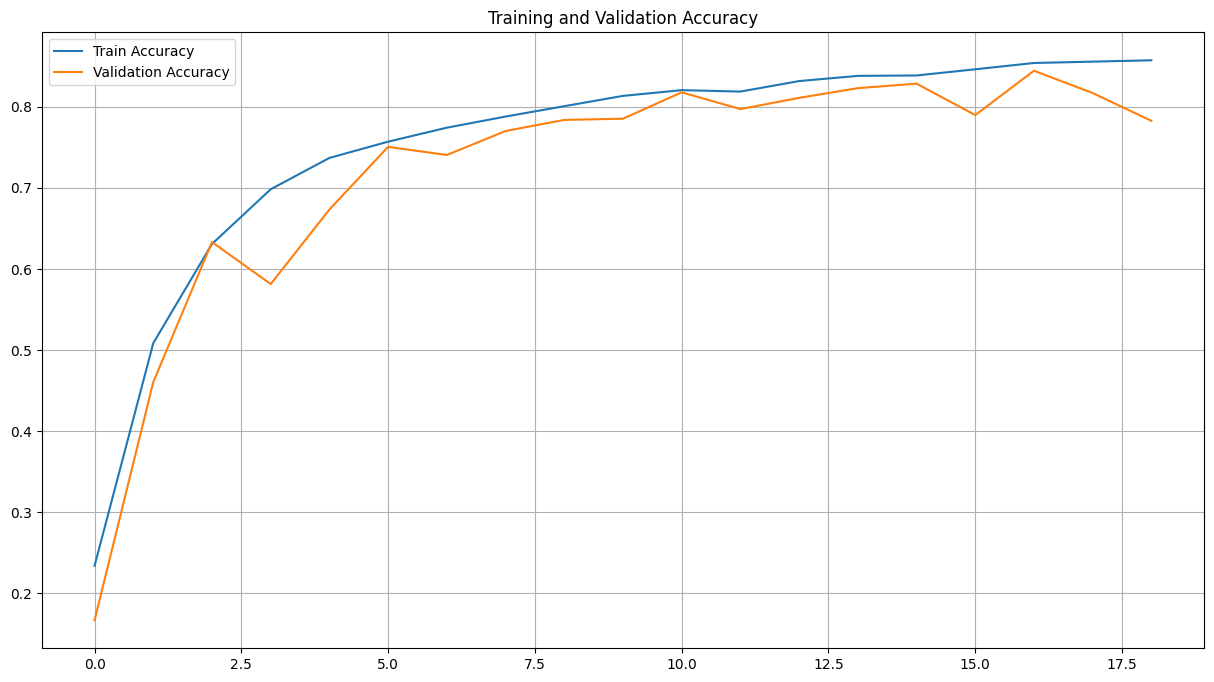

In [124]:
plt.figure(figsize=(15, 8))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()

In [6]:
from tensorflow.keras.models import load_model

best_model = load_model('model.keras')
loss, accuracy = best_model.evaluate(val_data)

print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

113/113 ━━━━━━━━━━━━━━━━━━━━ 28s 243ms/step - accuracy: 0.8893 - loss: 0.3162
Loss: 0.4555, Accuracy: 0.8444
